In [21]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib as mp
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
sb.set() # set the default Seaborn style for graphics

In [22]:
df = pd.read_csv('cardio.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70000 non-null  int64  
 1   Age     70000 non-null  int64  
 2   Gender  70000 non-null  object 
 3   Height  70000 non-null  int64  
 4   Weight  70000 non-null  float64
 5   BMI     70000 non-null  float64
 6   AP_HI   70000 non-null  int64  
 7   AP_LO   70000 non-null  int64  
 8   Chol    70000 non-null  object 
 9   Gluc    70000 non-null  object 
 10  Smoke   70000 non-null  int64  
 11  Alco    70000 non-null  int64  
 12  Active  70000 non-null  int64  
 13  Cardio  70000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.5+ MB


In [3]:
#finding whisker range of AP_LO
q1 = df.AP_LO.quantile(0.25)
q3 = df.AP_LO.quantile(0.75)
iqr = q3 - q1
low_lim = q1 - 1.5 * iqr
upp_lim = q3 + 1.5 * iqr

q1, q3

(80.0, 90.0)

In [4]:
#finding whisker range of AP_HI
Q1 = df.AP_HI.quantile(0.25)
Q3 = df.AP_HI.quantile(0.75)
IQR = Q3 - Q1
Low_lim = Q1 - 1.5 * IQR
Upp_lim = Q3 + 1.5 * IQR

Q1, Q3

(120.0, 140.0)

In [5]:
#finding whisker range of BMI
QB1 = df.BMI.quantile(0.25)
QB3 = df.BMI.quantile(0.75)
IQRB = QB3 - QB1
Low_limB = QB1 - 1.5 * IQRB
Upp_limB = QB3 + 1.5 * IQRB

QB1, QB3

(23.9, 30.2)

In [6]:
#remove outlier
no_outlier = df[(df.AP_HI > Low_lim) & (df.AP_HI < Upp_lim) & (df.AP_LO > low_lim) & (df.AP_LO < upp_lim)&(df.BMI>Low_limB)&(df.BMI<Upp_limB)]
no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      61979 non-null  int64  
 1   Age     61979 non-null  int64  
 2   Gender  61979 non-null  object 
 3   Height  61979 non-null  int64  
 4   Weight  61979 non-null  float64
 5   BMI     61979 non-null  float64
 6   AP_HI   61979 non-null  int64  
 7   AP_LO   61979 non-null  int64  
 8   Chol    61979 non-null  object 
 9   Gluc    61979 non-null  object 
 10  Smoke   61979 non-null  int64  
 11  Alco    61979 non-null  int64  
 12  Active  61979 non-null  int64  
 13  Cardio  61979 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 7.1+ MB


In [7]:
numeric_DF = pd.DataFrame(no_outlier[['Age', 'Height', 'Weight', 'BMI', 'AP_HI', 'AP_LO']])
numeric_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61979 entries, 0 to 69999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     61979 non-null  int64  
 1   Height  61979 non-null  int64  
 2   Weight  61979 non-null  float64
 3   BMI     61979 non-null  float64
 4   AP_HI   61979 non-null  int64  
 5   AP_LO   61979 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 3.3 MB


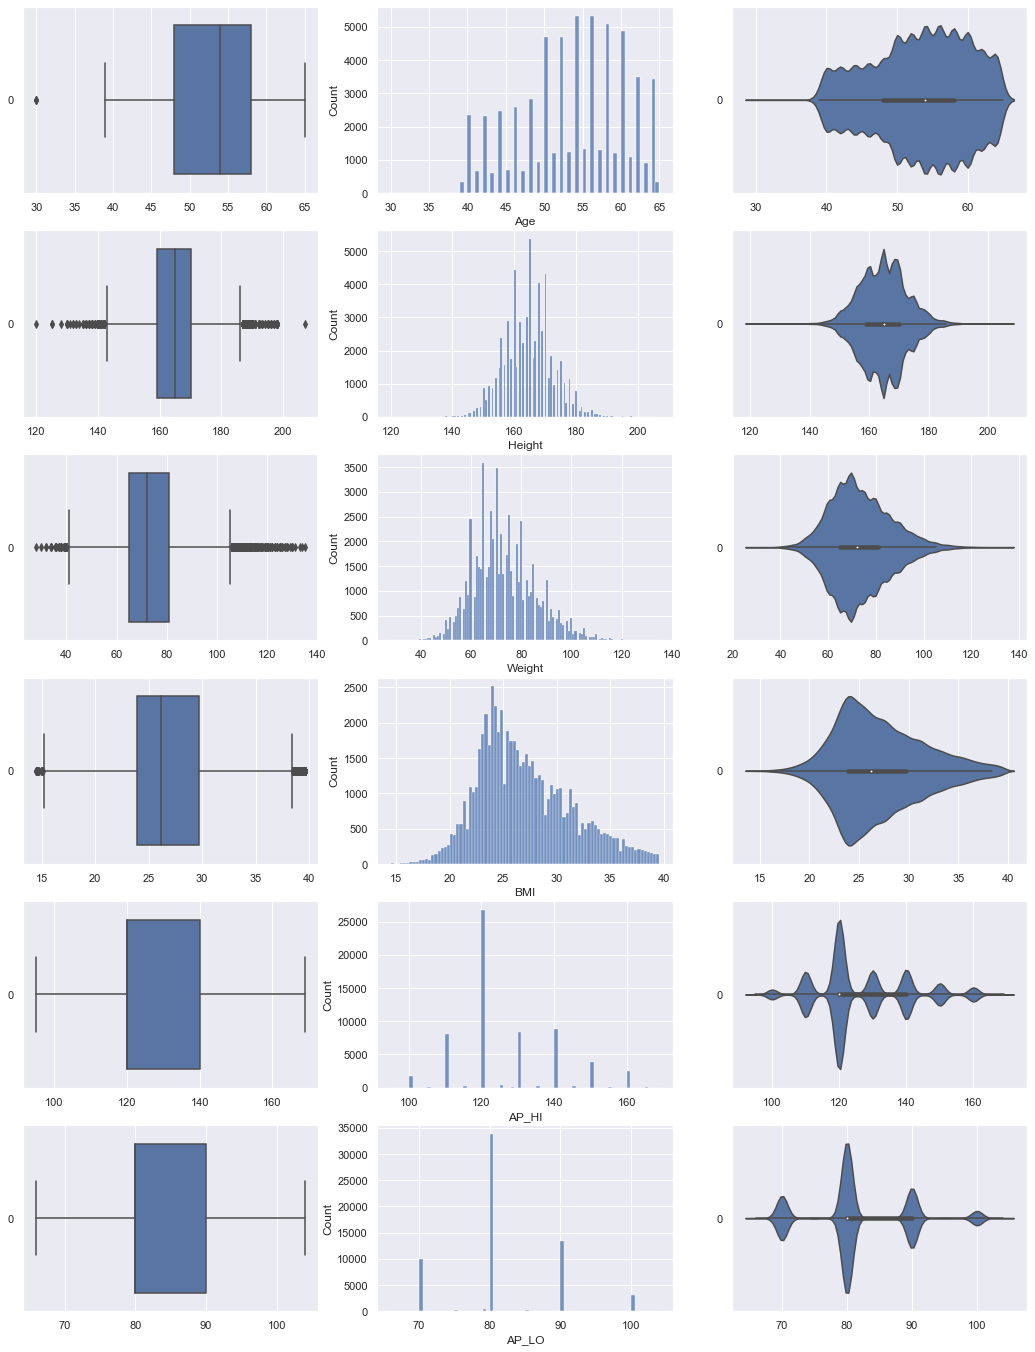

In [8]:
f, axes = mp.pyplot.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_DF:
    sb.boxplot(data = numeric_DF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_DF[var], ax = axes[count,1])
    sb.violinplot(data = numeric_DF[var], orient = "h", ax = axes[count,2])
    count += 1

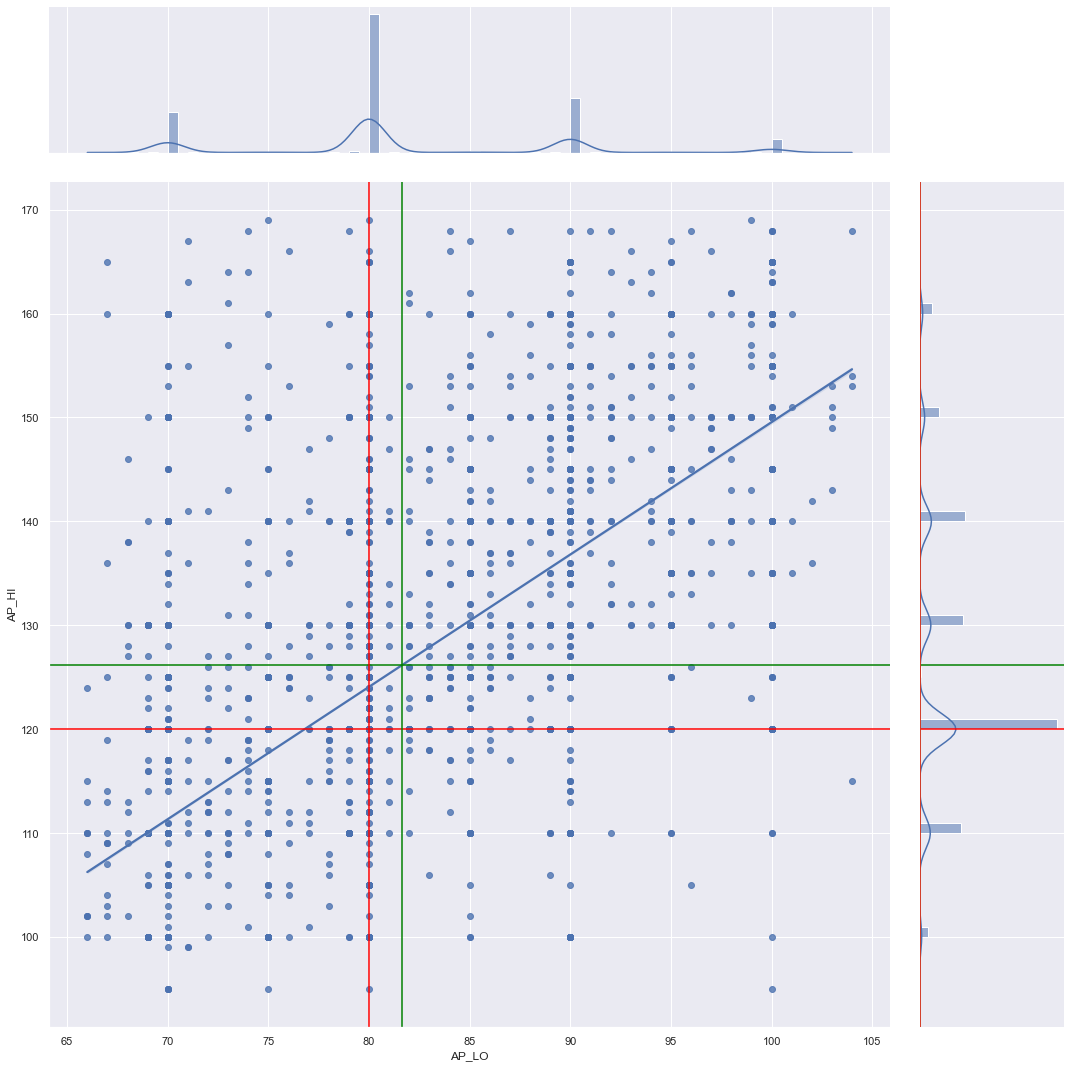

In [23]:
# jointplot for scatterplot and regression line of YearRemodAdd and SalePrice
g_p = sb.jointplot(data = no_outlier, y = 'AP_HI', x = 'AP_LO', kind = 'reg', height = 15)
mean = no_outlier['AP_HI'].mean()
median = no_outlier['AP_HI'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')
mean_v = no_outlier['AP_LO'].mean()
median_v = no_outlier['AP_LO'].median()
# green formean
g_p.ax_joint.axvline(x=mean_v).set_color('green')
mp.pyplot.axvline(mean_v).set_color('green')
# red for median
g_p.ax_joint.axvline(x=median_v).set_color('red')
mp.pyplot.axvline(median_v).set_color('red')

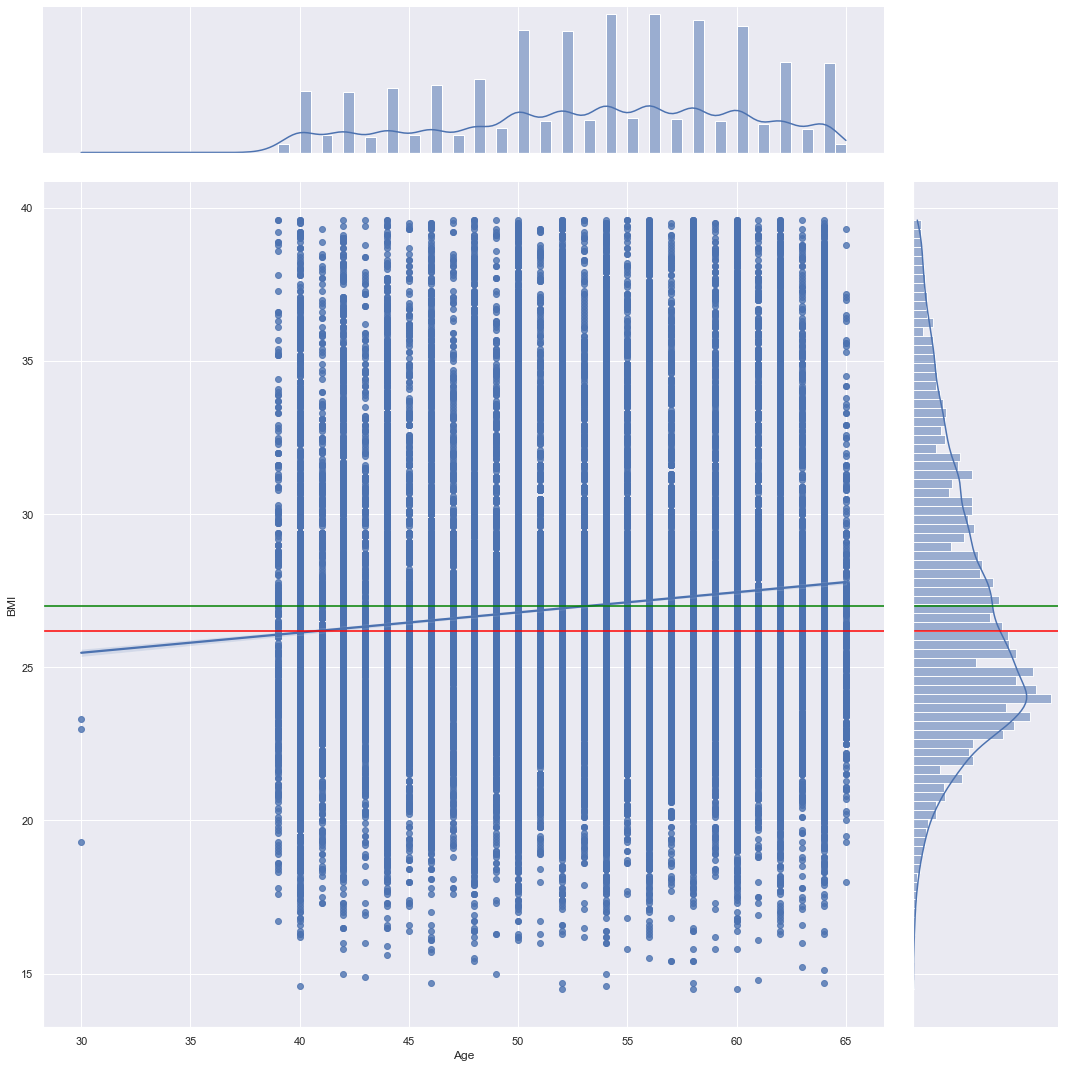

In [24]:
# jointplot for scatterplot and regression line of YearRemodAdd and SalePrice
g_p = sb.jointplot(data = no_outlier, y = 'BMI', x = 'Age', kind = 'reg', height = 15)
mean = no_outlier['BMI'].mean()
median = no_outlier['BMI'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

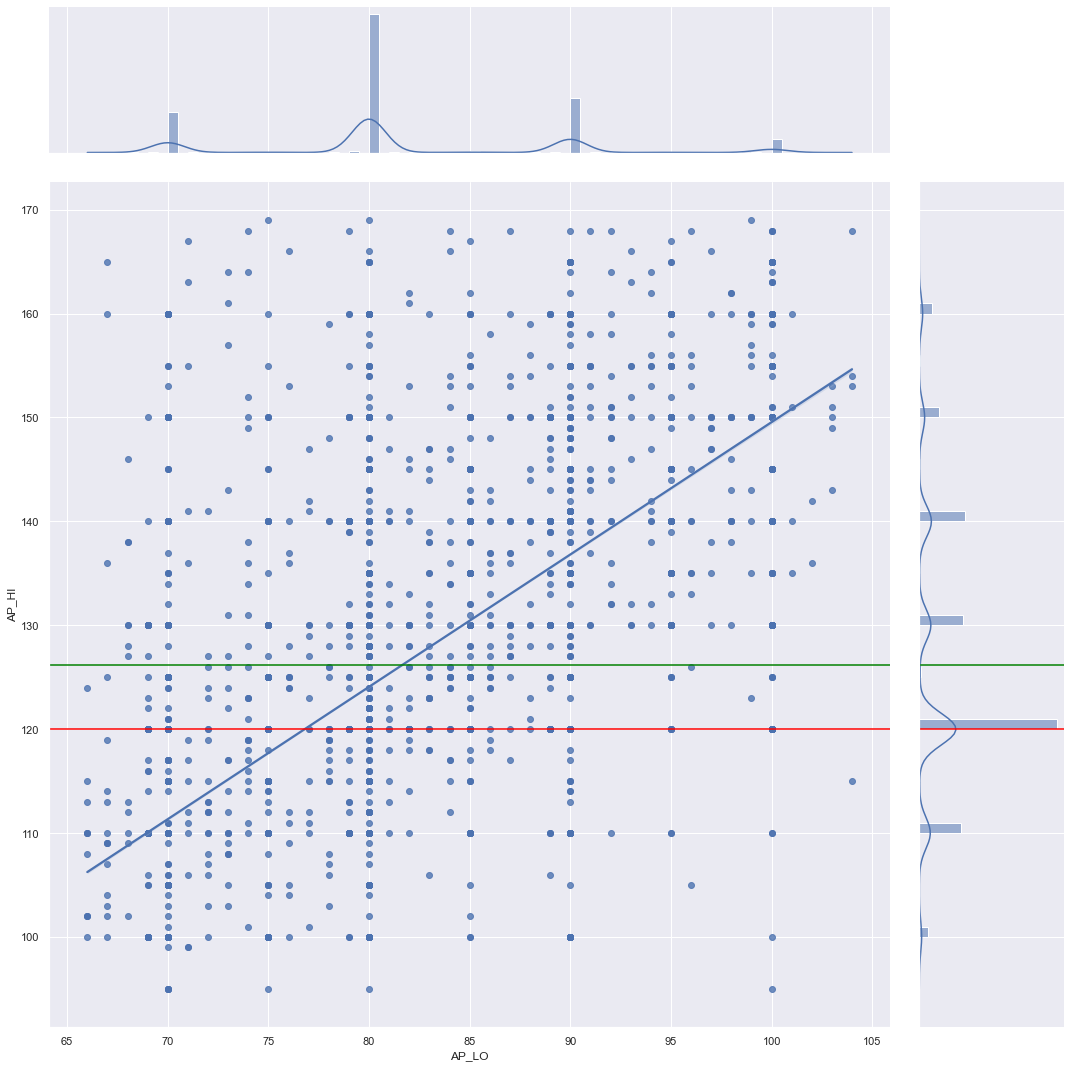

In [25]:
# jointplot for scatterplot and regression line of YearRemodAdd and SalePrice
g_p = sb.jointplot(data = no_outlier, y = 'AP_HI', x = 'AP_LO', kind = 'reg', height = 15)
mean = no_outlier['AP_HI'].mean()
median = no_outlier['AP_HI'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

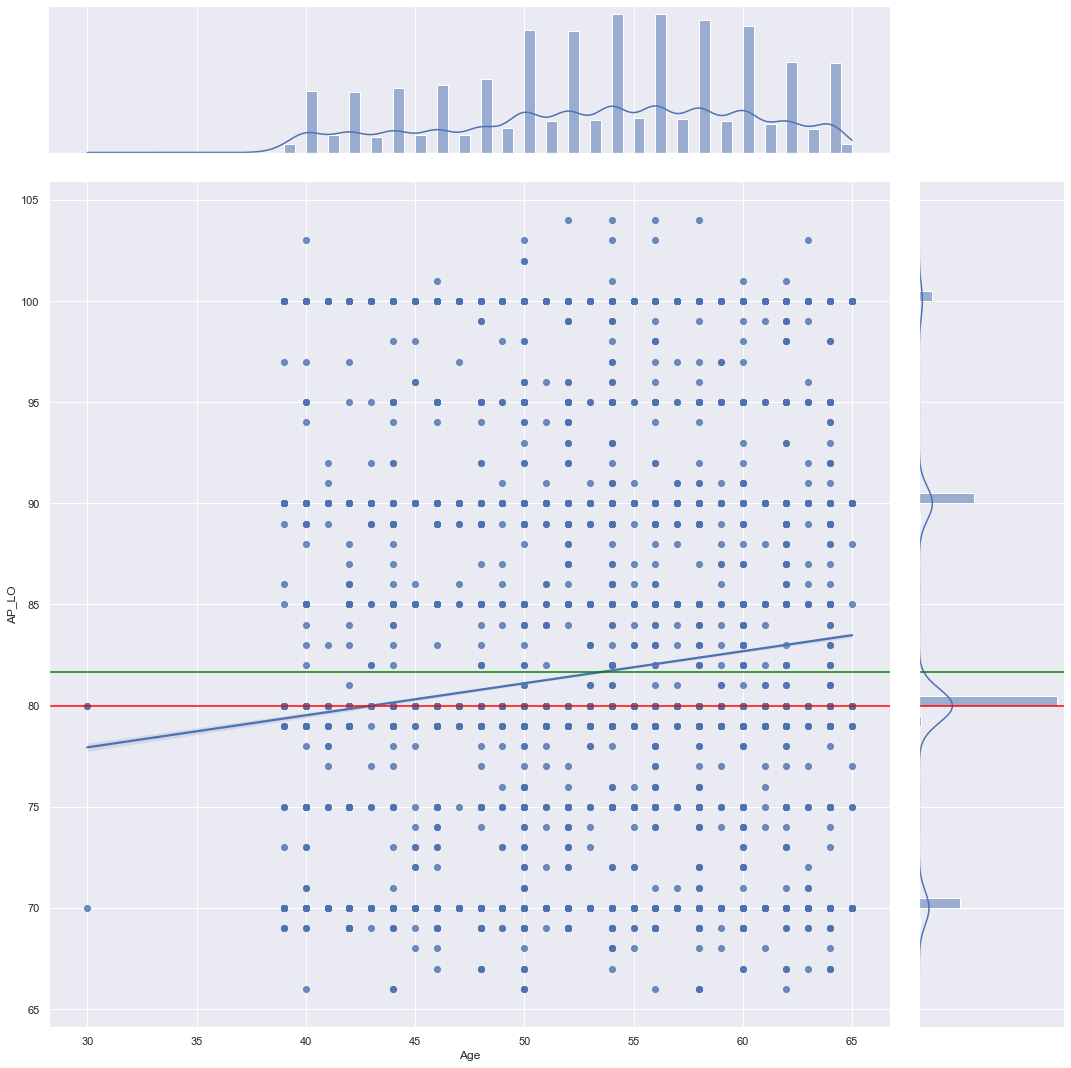

In [26]:
# jointplot for scatterplot and regression line of YearRemodAdd and SalePrice
g_p = sb.jointplot(data = no_outlier, y = 'AP_LO', x = 'Age', kind = 'reg', height = 15)
mean = no_outlier['AP_LO'].mean()
median = no_outlier['AP_LO'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

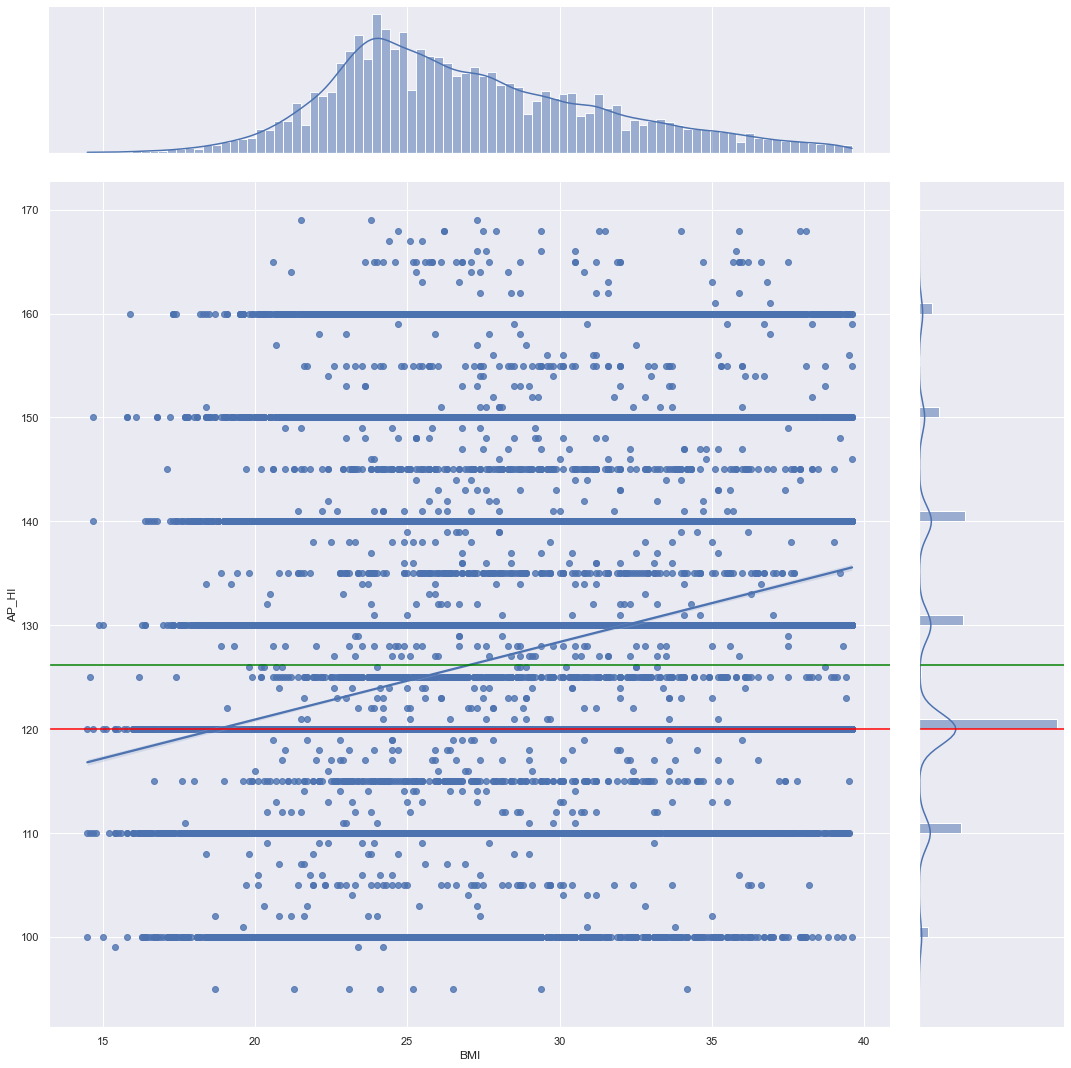

In [27]:
# jointplot for scatterplot and regression line of YearRemodAdd and SalePrice
g_p = sb.jointplot(data = no_outlier, y = 'AP_HI', x = 'BMI', kind = 'reg', height = 15)
mean = no_outlier['AP_HI'].mean()
median = no_outlier['AP_HI'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

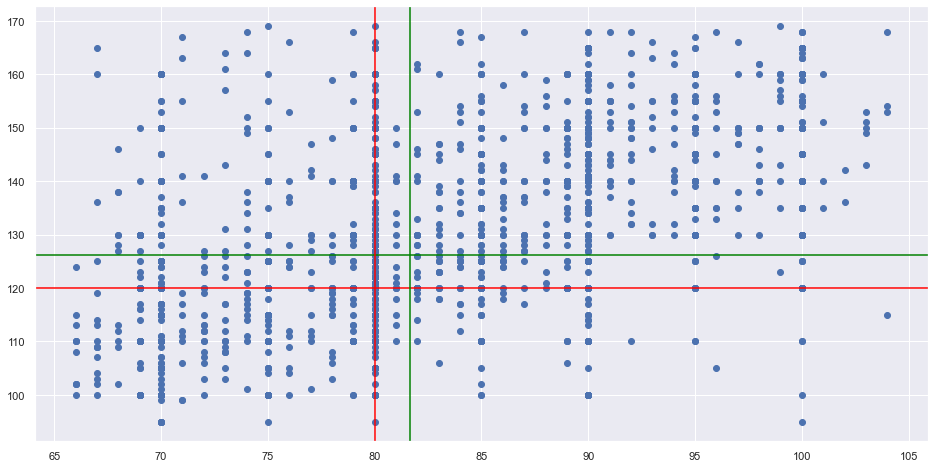

In [28]:
# Extract the Features from the Data
X = pd.DataFrame(no_outlier[["AP_HI", "AP_LO"]])

# Plot the Raw Data on a 2D grid
f = mp.pyplot.figure(figsize=(16,8))
mp.pyplot.scatter(x = "AP_LO", y = "AP_HI", data = X)

mean = no_outlier['AP_HI'].mean()
median = no_outlier['AP_HI'].median()
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

mean_v = no_outlier['AP_LO'].mean()
median_v = no_outlier['AP_LO'].median()
# green formean
g_p.ax_joint.axvline(x=mean_v).set_color('green')
mp.pyplot.axvline(mean_v).set_color('green')
# red for median
g_p.ax_joint.axvline(x=median_v).set_color('red')
mp.pyplot.axvline(median_v).set_color('red')

In [29]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

In [30]:
# Print the Cluster Centers
print("Features", "\tAP_HI", "\tAP_LO")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	AP_HI 	AP_LO

Cluster 0:	110.38	72.39	
Cluster 1:	145.68	89.49	
Cluster 2:	122.47	81.18	


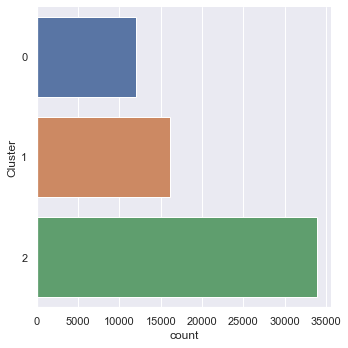

In [31]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

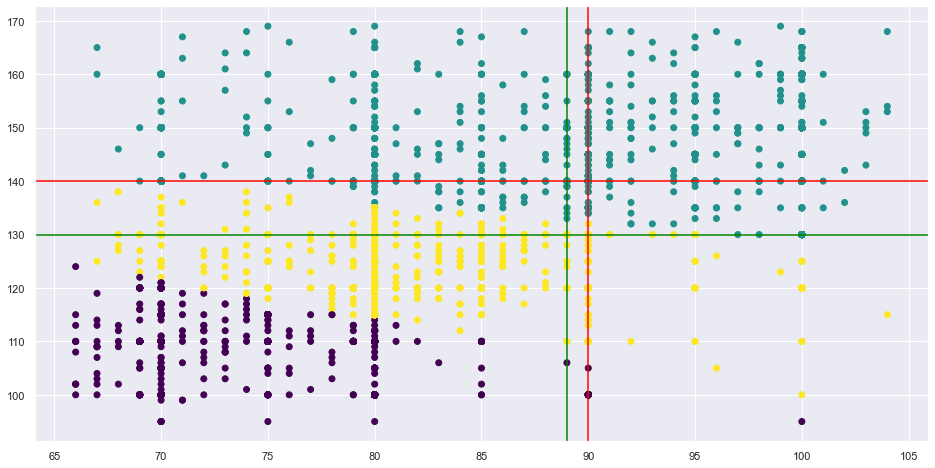

In [32]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "AP_LO", y = "AP_HI", c = "Cluster", cmap = 'viridis', data = X_labeled)

mean = 130
median = 140
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

mean_v = 89
median_v = 90
# green formean
g_p.ax_joint.axvline(x=mean_v).set_color('green')
mp.pyplot.axvline(mean_v).set_color('green')
# red for median
g_p.ax_joint.axvline(x=median_v).set_color('red')
mp.pyplot.axvline(median_v).set_color('red')

In [33]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 3585750.45550472


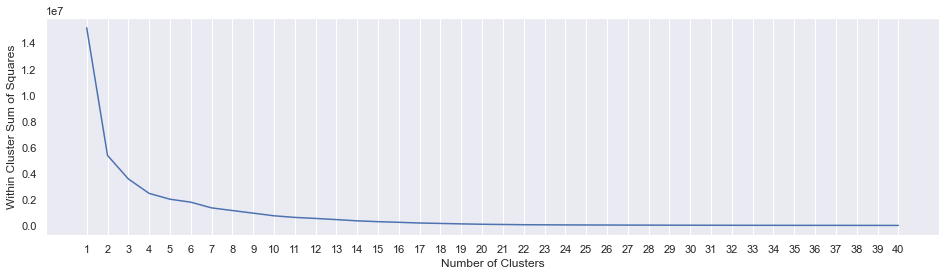

In [34]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(no_outlier[["AP_HI", "AP_LO"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	121.51	79.55	
Cluster 1:	153.92	91.36	
Cluster 2:	137.25	88.55	
Cluster 3:	108.25	72.92	

Within Cluster Sum of Squares : 2476206.003759196



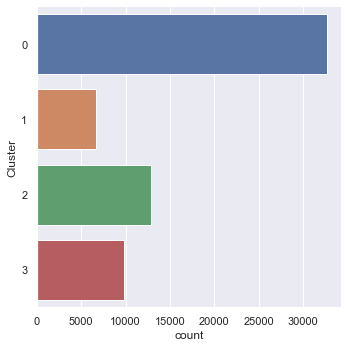

In [35]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

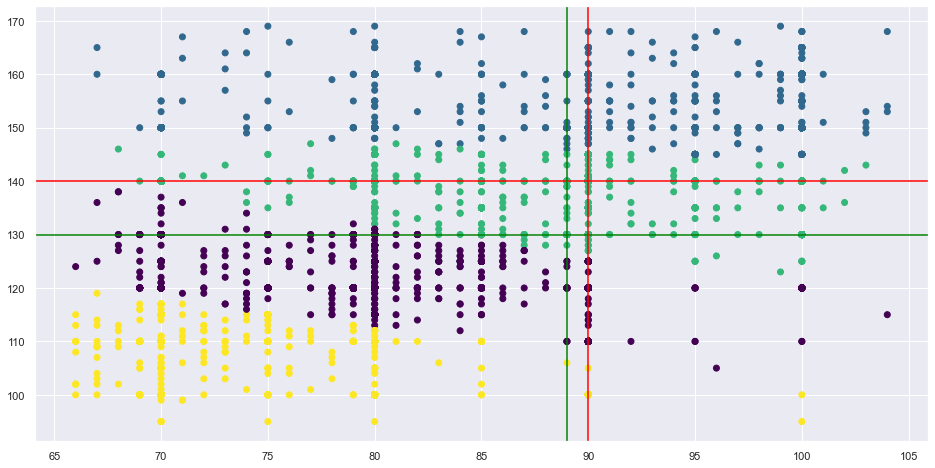

In [36]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "AP_LO", y = "AP_HI", c = "Cluster", cmap = 'viridis', data = X_labeled)

mean = 130
median = 140
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

mean_v = 89
median_v = 90
# green formean
g_p.ax_joint.axvline(x=mean_v).set_color('green')
mp.pyplot.axvline(mean_v).set_color('green')
# red for median
g_p.ax_joint.axvline(x=median_v).set_color('red')
mp.pyplot.axvline(median_v).set_color('red')

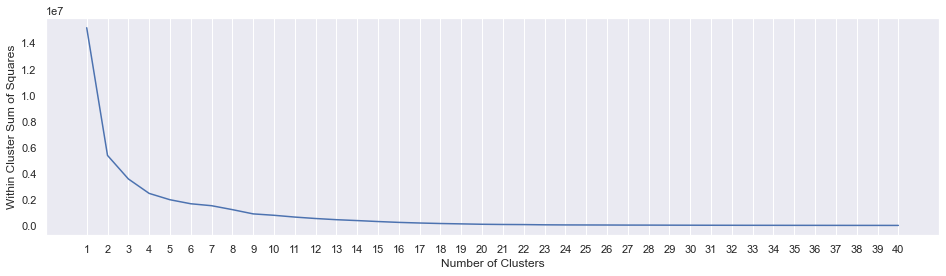

In [37]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(no_outlier[["AP_HI", "AP_LO"]])

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust,        # number of clusters
                    init = init_algo,              # initialization algorithm
                    n_init = 5)                    # number of initializations
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Features 	AP_HI 	AP_LO

Cluster 0:	121.51	79.56	
Cluster 1:	137.25	88.55	
Cluster 2:	108.25	72.92	
Cluster 3:	153.92	91.36	

Within Cluster Sum of Squares : 2476205.9407181414



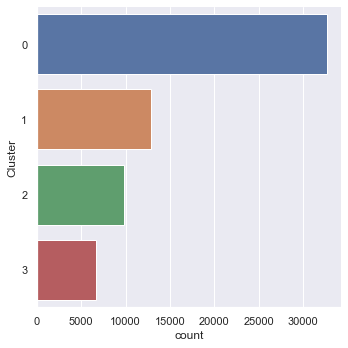

In [38]:
# Set "optimal" Number of Clusters
num_clust = 4

# Set the Initialization to KMeans++
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tAP_HI", "\tAP_LO")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

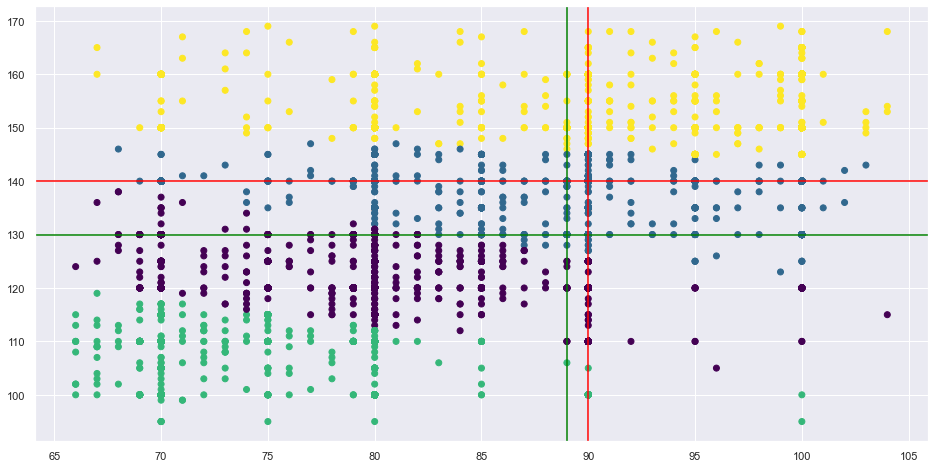

In [39]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "AP_LO", y = "AP_HI", c = "Cluster", cmap = 'viridis', data = X_labeled)

mean = 130
median = 140
# green formean
g_p.ax_joint.axhline(y=mean).set_color('green')
mp.pyplot.axhline(mean).set_color('green')
# red for median
g_p.ax_joint.axhline(y=median).set_color('red')
mp.pyplot.axhline(median).set_color('red')

mean_v = 89
median_v = 90
# green formean
g_p.ax_joint.axvline(x=mean_v).set_color('green')
mp.pyplot.axvline(mean_v).set_color('green')
# red for median
g_p.ax_joint.axvline(x=median_v).set_color('red')
mp.pyplot.axvline(median_v).set_color('red')

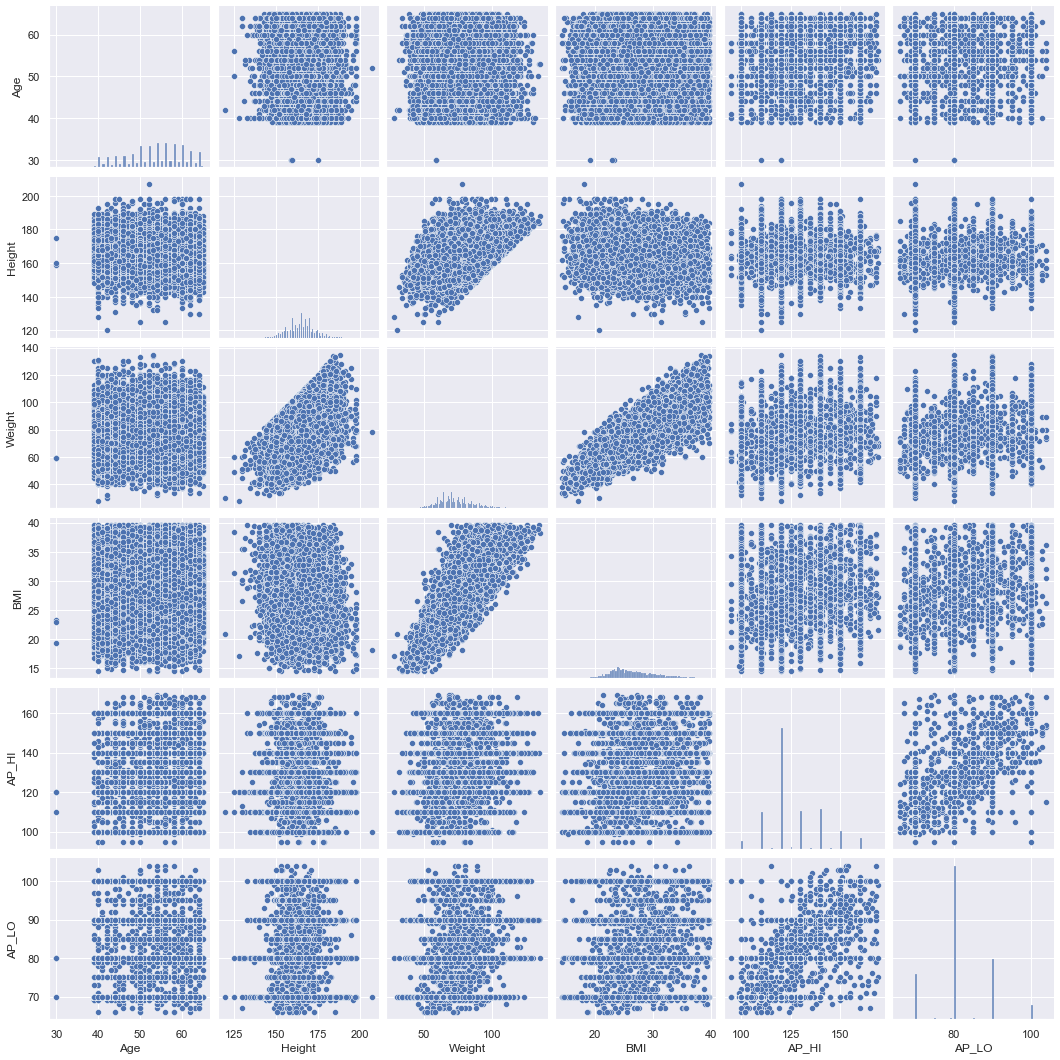

In [40]:
# Extract the Features from the Data
X = pd.DataFrame(numeric_DF) 

# Plot the Raw Data on 2D grids
sb.pairplot(X)

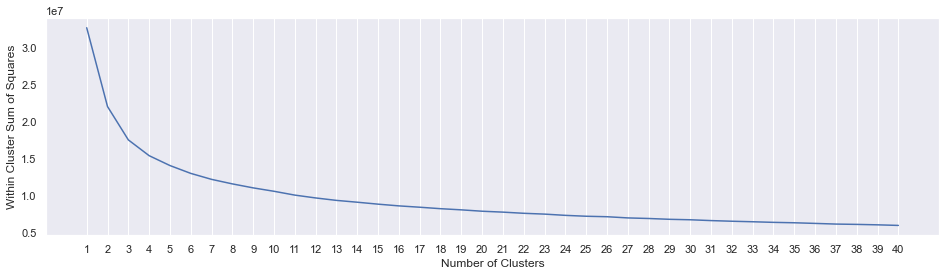

In [41]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [42]:
# Import essential models from sklearn
from sklearn.cluster import KMeans

# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=4, n_init=20)

Features 	Age 	Height 	Weight 	BMI 	AP_HI 	AP_LO

Cluster 0:	54.64	168.02	90.61	32.24	144.0	89.84	
Cluster 1:	52.3	162.79	63.91	24.17	117.41	77.54	
Cluster 2:	55.29	161.77	68.12	26.13	142.5	88.87	
Cluster 3:	53.12	168.0	82.89	29.54	120.22	79.21	

Within Cluster Sum of Squares : 15414665.372631086



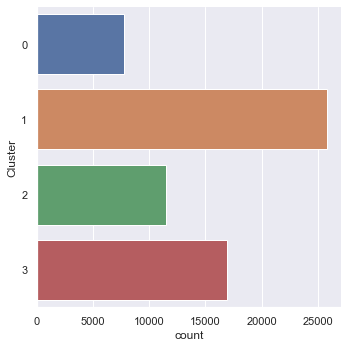

In [43]:
# Print the Cluster Centers
print("Features", "\tAge", "\tHeight", "\tWeight", "\tBMI", "\tAP_HI", "\tAP_LO")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

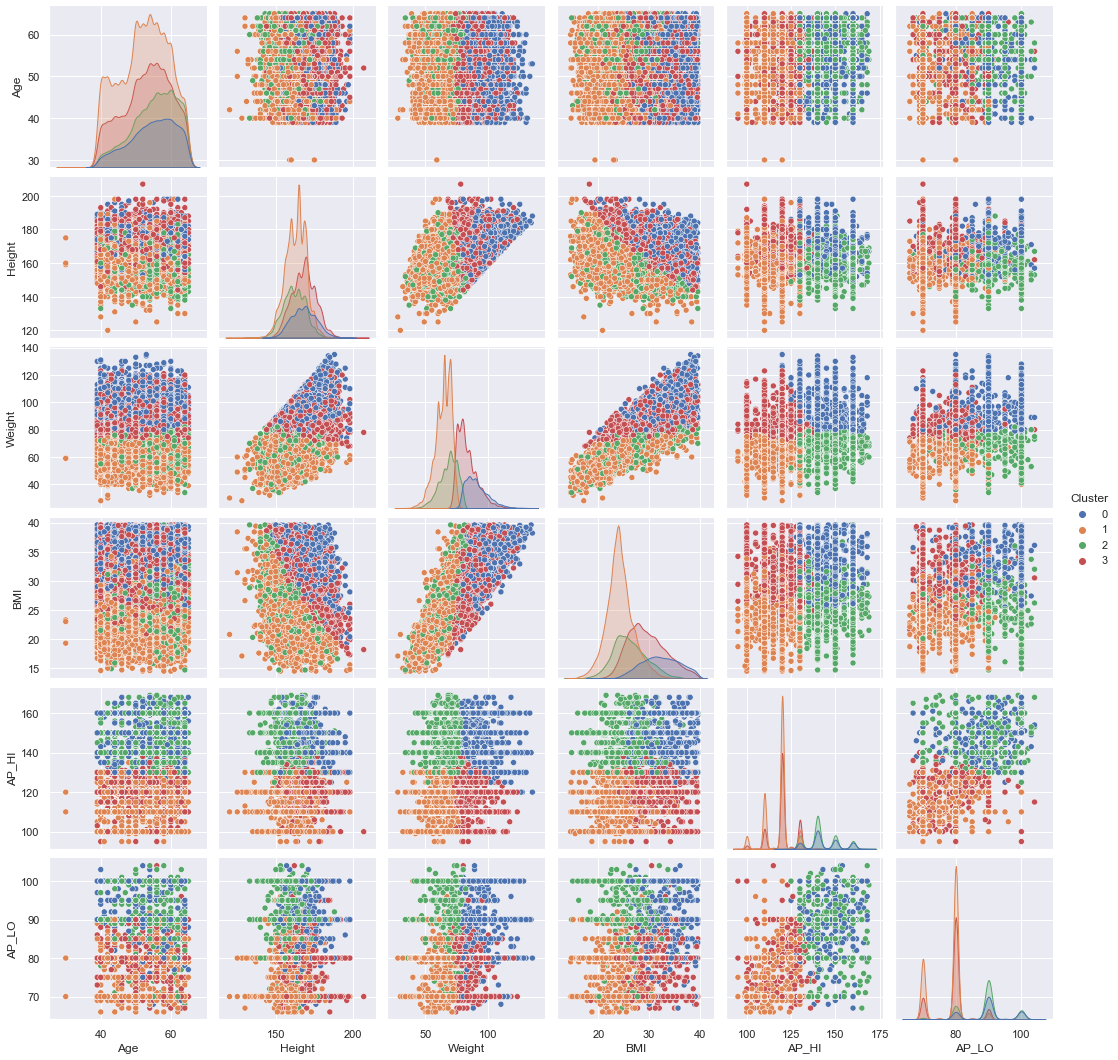

In [44]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

<AxesSubplot:xlabel='AP_LO', ylabel='Cluster'>

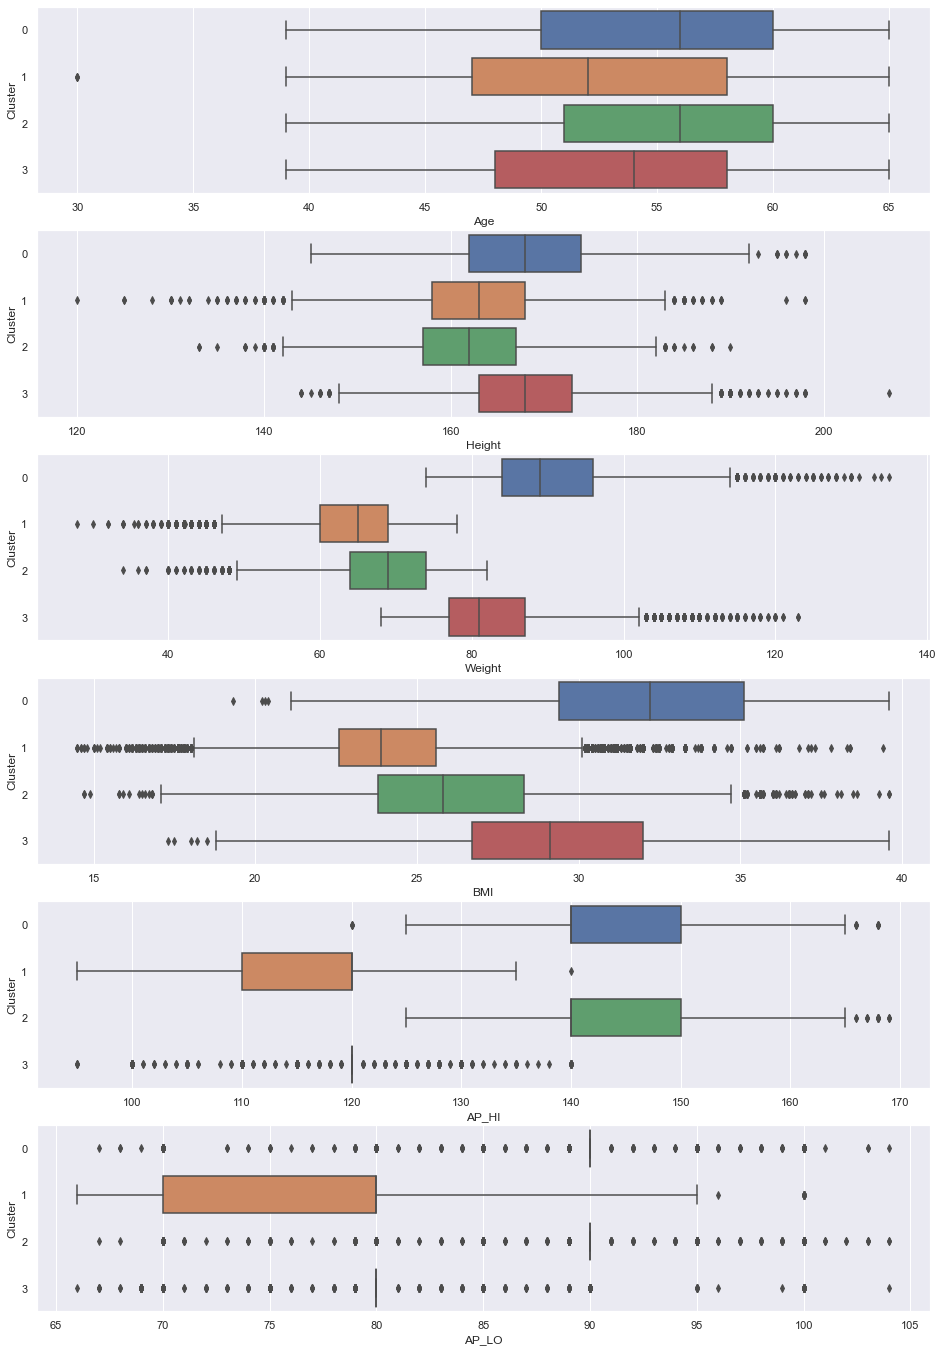

In [45]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(6, 1, figsize=(16,24))
sb.boxplot(x = 'Age', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Height', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Weight', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'BMI', y = 'Cluster', data = X_labeled, ax = axes[3])
sb.boxplot(x = 'AP_HI', y = 'Cluster', data = X_labeled, ax = axes[4])
sb.boxplot(x = 'AP_LO', y = 'Cluster', data = X_labeled, ax = axes[5])

<AxesSubplot:xlabel='Cluster'>

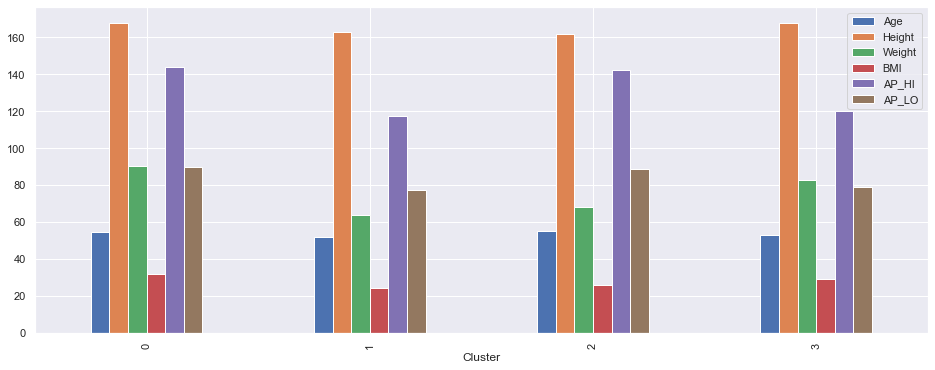

In [46]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))